In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4/S10/')

Now we can import the library and use the function.

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor
from models import Resnet18 as resnet18
from transformations import CIFARModel11_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet18.ResNet18().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)


import numpy as np
import matplotlib.pyplot as plt
import os



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


SHOW PARAMETERS

In [5]:
from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps, plot_accuracy_loss_graphs

import utils.global_fun as fun
from models import ResnetA11 as resnet_a11

#CIFAR transformations and updates for assignment 10
from transformations import CIFARModel11_Alb as cifar

import importlib
importlib.reload(resnet_a11)
importlib.reload(cifar)
importlib.reload(fun) 



criterion = torch.nn.CrossEntropyLoss()
cifar_model = cifar.CIFARModel11_Alb(model,criterion,None,None)
show_summary(cifar_model,input_size=(3,32,32))


Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13       

LR FINDER

Increases the learning rate in an exponential manner and computes the training loss for each learning rate. lr_finder.plot() plots the training loss versus logarithmic learning rate.

In [6]:
%matplotlib inline
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from lr_finder import LRFinder as lrfinder

#model1 = resnet_a11.ResNetA11().to(device)
#criterion1 = nn.CrossEntropyLoss()

optimizer = optim.SGD(cifar_model.m_model.parameters(), lr=1e-7)
lr_finder = lrfinder.LRFinder(cifar_model.m_model, optimizer, criterion, device="cuda")



  pip install torch-lr-finder -v --global-option="amp"


**Training** Loss


Learning rate search finished. See the graph with {finder_name}.plot()
Min LOSS = 2.246919422353636 at LR = 0.06606934480075952


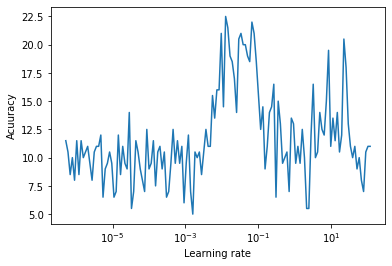

In [7]:
lr_finder.range_test(cifar_model.m_train_loader, end_lr=100, num_iter=150, step_mode="exp")
lr_finder.plot(skip_end=0, accuracy_flag = True)
lr_finder.reset()

## Train the model with best Learning Rate got from LR Finder

In [0]:
import torch.optim as optim
#from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = optim.SGD(model.parameters(), lr=0.06606934480075952, momentum=0.9, weight_decay=5e-4)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 2)


cifar_model.setOptimizer(optimizer)
cifar_model.setScheduler(scheduler)

RUNNING WITH REGULARIZATION

In [10]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0004, EPOCHS=50)

  0%|          | 0/250 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 0


Loss=1.6628416776657104 Batch_id=249 Accuracy=33.47: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 4563/10000 (45.63%)

EPOCH: 1
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 1


Loss=1.1984530687332153 Batch_id=249 Accuracy=48.49: 100%|██████████| 250/250 [00:31<00:00,  8.01it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 5752/10000 (57.52%)

EPOCH: 2
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 2


  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 6538/10000 (65.38%)

EPOCH: 3
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 3


Loss=1.1011348962783813 Batch_id=249 Accuracy=63.18: 100%|██████████| 250/250 [00:31<00:00,  7.94it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 6862/10000 (68.62%)

EPOCH: 4
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 4


Loss=0.7494703531265259 Batch_id=249 Accuracy=68.04: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 7253/10000 (72.53%)

EPOCH: 5
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 5


Loss=0.6561718583106995 Batch_id=249 Accuracy=71.30: 100%|██████████| 250/250 [00:31<00:00,  7.96it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 7491/10000 (74.91%)

EPOCH: 6
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 6


Loss=0.6876145005226135 Batch_id=249 Accuracy=74.72: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7843/10000 (78.43%)

EPOCH: 7
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 7


Loss=0.6866812705993652 Batch_id=249 Accuracy=76.42: 100%|██████████| 250/250 [00:31<00:00,  7.98it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7960/10000 (79.60%)

EPOCH: 8
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 8


Loss=0.48473888635635376 Batch_id=249 Accuracy=78.17: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8096/10000 (80.96%)

EPOCH: 9
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 9


Loss=0.6258018612861633 Batch_id=249 Accuracy=79.49: 100%|██████████| 250/250 [00:31<00:00,  7.93it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8140/10000 (81.40%)

EPOCH: 10
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 10


Loss=0.6567690372467041 Batch_id=249 Accuracy=80.16: 100%|██████████| 250/250 [00:31<00:00,  7.98it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8194/10000 (81.94%)

EPOCH: 11
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 11


Loss=0.49022018909454346 Batch_id=249 Accuracy=81.46: 100%|██████████| 250/250 [00:31<00:00,  8.03it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8036/10000 (80.36%)

EPOCH: 12
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 12


Loss=0.6034457683563232 Batch_id=249 Accuracy=82.04: 100%|██████████| 250/250 [00:31<00:00,  8.01it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8188/10000 (81.88%)

EPOCH: 13
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 13


Loss=0.5005902051925659 Batch_id=249 Accuracy=82.91: 100%|██████████| 250/250 [00:31<00:00,  8.06it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8604/10000 (86.04%)

EPOCH: 14
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 14


Loss=0.5465208888053894 Batch_id=249 Accuracy=83.47: 100%|██████████| 250/250 [00:31<00:00,  8.04it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8180/10000 (81.80%)

EPOCH: 15
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 15


Loss=0.4373389184474945 Batch_id=249 Accuracy=83.72: 100%|██████████| 250/250 [00:31<00:00,  8.02it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8621/10000 (86.21%)

EPOCH: 16
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 16


Loss=0.43474751710891724 Batch_id=249 Accuracy=84.22: 100%|██████████| 250/250 [00:31<00:00,  7.94it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8519/10000 (85.19%)

EPOCH: 17
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 17


Loss=0.4921934902667999 Batch_id=249 Accuracy=84.68: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8325/10000 (83.25%)

EPOCH: 18
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 18


Loss=0.48296448588371277 Batch_id=249 Accuracy=84.83: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8624/10000 (86.24%)

EPOCH: 19
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 19


Loss=0.3088582158088684 Batch_id=249 Accuracy=85.13: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8625/10000 (86.25%)

EPOCH: 20
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 20


Loss=0.35297879576683044 Batch_id=249 Accuracy=85.10: 100%|██████████| 250/250 [00:31<00:00,  7.92it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8525/10000 (85.25%)

EPOCH: 21
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 21


Loss=0.42323729395866394 Batch_id=249 Accuracy=85.51: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8247/10000 (82.47%)

EPOCH: 22
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 22


Loss=0.37337726354599 Batch_id=249 Accuracy=85.67: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8565/10000 (85.65%)

EPOCH: 23
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 23


Loss=0.3781885802745819 Batch_id=249 Accuracy=85.93: 100%|██████████| 250/250 [00:31<00:00,  8.01it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8456/10000 (84.56%)

EPOCH: 24
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 24


Loss=0.5265964269638062 Batch_id=249 Accuracy=86.23: 100%|██████████| 250/250 [00:31<00:00,  7.94it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8508/10000 (85.08%)

EPOCH: 25
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 25


Loss=0.3046781122684479 Batch_id=249 Accuracy=86.24: 100%|██████████| 250/250 [00:31<00:00,  7.96it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8366/10000 (83.66%)

EPOCH: 26
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 26


Loss=0.3441975712776184 Batch_id=249 Accuracy=86.37: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8773/10000 (87.73%)

EPOCH: 27
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 27


Loss=0.327753484249115 Batch_id=249 Accuracy=86.59: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8806/10000 (88.06%)

EPOCH: 28
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 28


Loss=0.32022562623023987 Batch_id=249 Accuracy=86.68: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8646/10000 (86.46%)

EPOCH: 29
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 29


Loss=0.3579004406929016 Batch_id=249 Accuracy=86.90: 100%|██████████| 250/250 [00:31<00:00,  7.96it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8610/10000 (86.10%)

EPOCH: 30
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 30


Loss=0.28183653950691223 Batch_id=249 Accuracy=86.87: 100%|██████████| 250/250 [00:31<00:00,  7.93it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8646/10000 (86.46%)

EPOCH: 31
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 31


Loss=0.41774410009384155 Batch_id=249 Accuracy=86.94: 100%|██████████| 250/250 [00:31<00:00,  7.96it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8791/10000 (87.91%)

EPOCH: 32
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 32


Loss=0.3611222505569458 Batch_id=249 Accuracy=87.02: 100%|██████████| 250/250 [00:31<00:00,  7.96it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8729/10000 (87.29%)

EPOCH: 33
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 33


Loss=0.38874712586402893 Batch_id=249 Accuracy=87.44: 100%|██████████| 250/250 [00:31<00:00,  8.04it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8640/10000 (86.40%)

EPOCH: 34
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 34


Loss=0.3758678138256073 Batch_id=249 Accuracy=87.25: 100%|██████████| 250/250 [00:31<00:00,  7.91it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8763/10000 (87.63%)

EPOCH: 35
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 35


Loss=0.3098903298377991 Batch_id=249 Accuracy=87.27: 100%|██████████| 250/250 [00:31<00:00,  8.00it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8653/10000 (86.53%)

EPOCH: 36
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 36


Loss=0.414936363697052 Batch_id=249 Accuracy=87.65: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8894/10000 (88.94%)

EPOCH: 37
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 37


Loss=0.4252799153327942 Batch_id=249 Accuracy=87.96: 100%|██████████| 250/250 [00:31<00:00,  8.01it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7986/10000 (79.86%)

EPOCH: 38
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 38


Loss=0.38646194338798523 Batch_id=249 Accuracy=87.61: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8475/10000 (84.75%)

EPOCH: 39
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 39


Loss=0.2957039177417755 Batch_id=249 Accuracy=87.67: 100%|██████████| 250/250 [00:31<00:00,  7.95it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8683/10000 (86.83%)

EPOCH: 40
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 40


Loss=0.4487905502319336 Batch_id=249 Accuracy=87.75: 100%|██████████| 250/250 [00:31<00:00,  7.98it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8508/10000 (85.08%)

EPOCH: 41
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 41


Loss=0.35979804396629333 Batch_id=249 Accuracy=87.82: 100%|██████████| 250/250 [00:31<00:00,  7.88it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8893/10000 (88.93%)

EPOCH: 42
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 42


Loss=0.3622841536998749 Batch_id=249 Accuracy=87.88: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8792/10000 (87.92%)

EPOCH: 43
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 43


Loss=0.26433494687080383 Batch_id=249 Accuracy=88.04: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8539/10000 (85.39%)

EPOCH: 44
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 44


Loss=0.3927600383758545 Batch_id=249 Accuracy=88.21: 100%|██████████| 250/250 [00:31<00:00,  8.00it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8666/10000 (86.66%)

EPOCH: 45
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 45


Loss=0.2996441721916199 Batch_id=249 Accuracy=88.12: 100%|██████████| 250/250 [00:31<00:00,  7.97it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8796/10000 (87.96%)

EPOCH: 46
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 46


Loss=0.3731862008571625 Batch_id=249 Accuracy=88.16: 100%|██████████| 250/250 [00:31<00:00,  7.99it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8511/10000 (85.11%)

EPOCH: 47
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 47


Loss=0.3708341121673584 Batch_id=249 Accuracy=88.06: 100%|██████████| 250/250 [00:31<00:00,  8.00it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8642/10000 (86.42%)

EPOCH: 48
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 48


Loss=0.4252585470676422 Batch_id=249 Accuracy=88.20: 100%|██████████| 250/250 [00:31<00:00,  7.98it/s]
  0%|          | 0/250 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8813/10000 (88.13%)

EPOCH: 49
L1= 1 ;L2= 0.0004 ;LAMBDA= 0 epoch= 49


Loss=0.3843504786491394 Batch_id=249 Accuracy=88.45: 100%|██████████| 250/250 [00:31<00:00,  8.00it/s]



Test set: Average loss: 0.0017, Accuracy: 8879/10000 (88.79%)



LOSS, ACCURACY GRAPHS

SAVE MODEL

In [0]:
state = {
    'epoch': 130,
    'state_dict': cifar_model.m_model.state_dict(),
    'optimizer': cifar_model.m_optimizer.state_dict()
}

filepath = "/content/gdrive/My Drive/EVA4/S10/"

torch.save(cifar_model.m_model.state_dict(), open(os.path.join(filepath, 'model.pt'), 'wb'))
torch.save(cifar_model.m_optimizer.state_dict(), open(os.path.join(filepath, 'optimizer.pt'), 'wb'))
torch.save(state, open(os.path.join(filepath, 'savedmodel'), 'wb'))

#model.load_state_dict(state['state_dict'])
#optimizer.load_state_dict(state['optimizer'])
#model = torch.load(filepath)


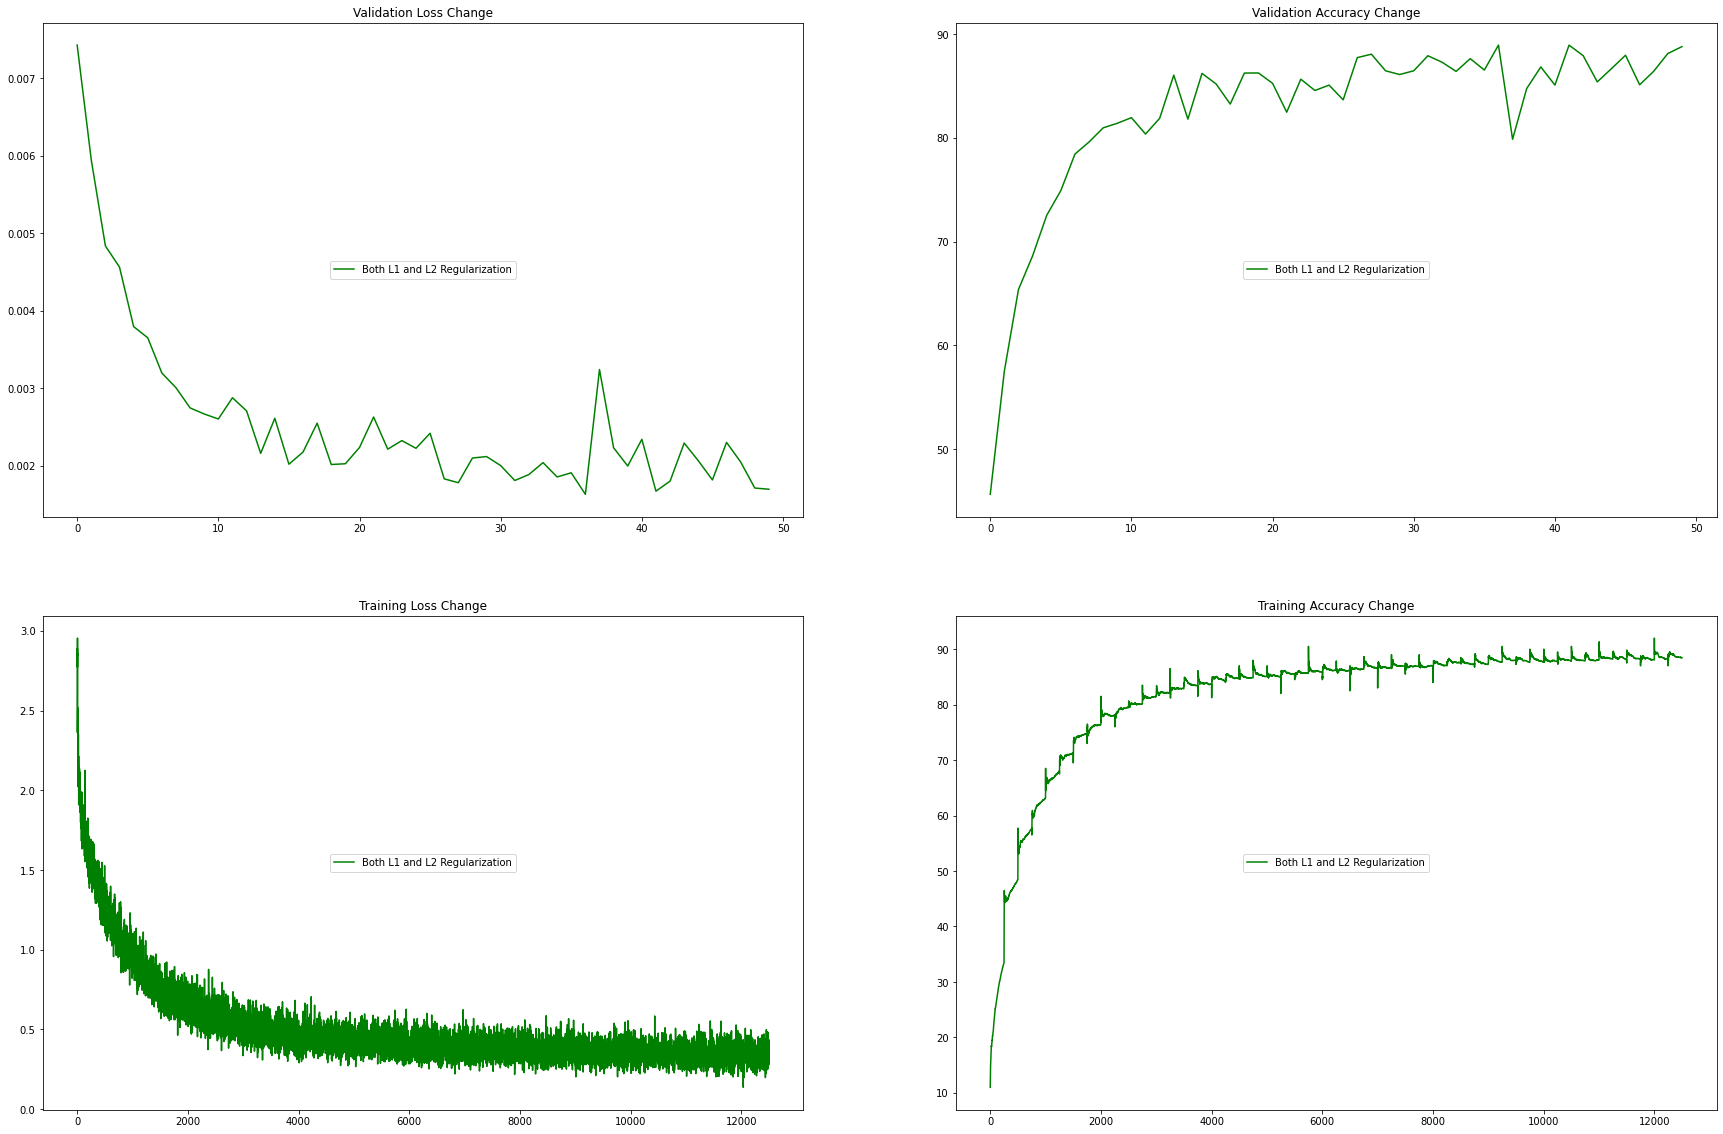

In [11]:
draw_accuracy_loss_change_graps(model_l1_l2 = cifar_model,single_plot= False)

GRADCAM VISUALIZATION

incorrect samples collected for gradcam= 30
####################################################################
Predicted value =  plane
activation Size :  (16, 16, 128)


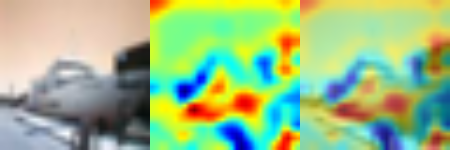

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  ship
activation Size :  (16, 16, 128)


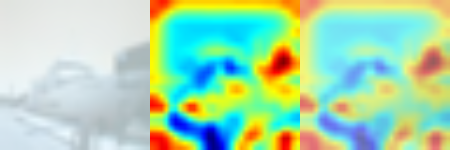

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


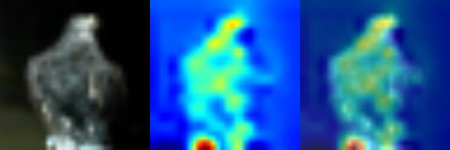

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


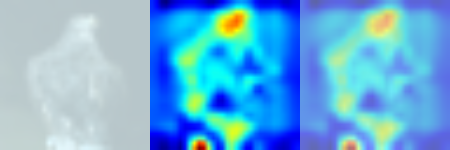

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


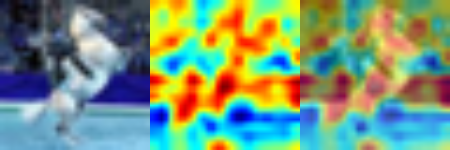

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  horse
activation Size :  (16, 16, 128)


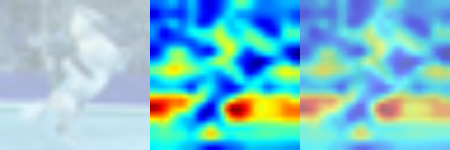

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


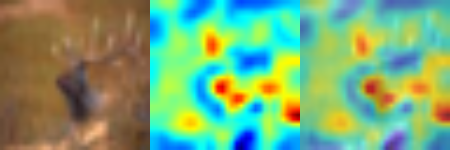

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  deer
activation Size :  (16, 16, 128)


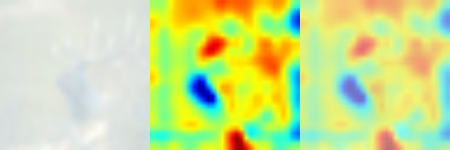

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  dog
activation Size :  (16, 16, 128)


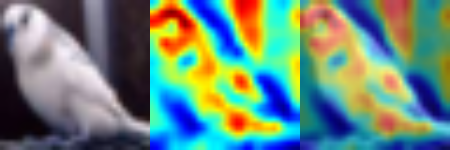

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


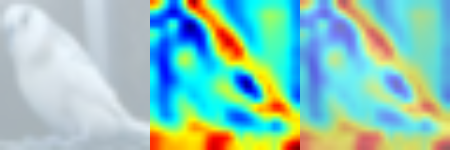

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  dog
activation Size :  (16, 16, 128)


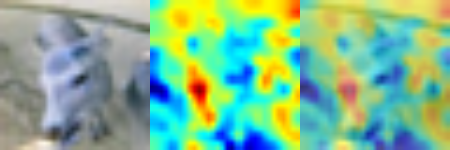

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  deer
activation Size :  (16, 16, 128)


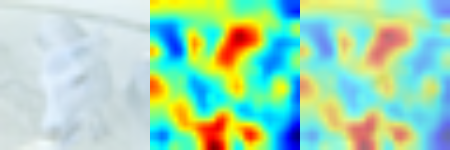

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  truck
activation Size :  (16, 16, 128)


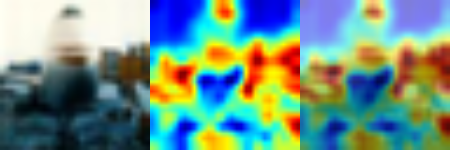

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  plane
activation Size :  (16, 16, 128)


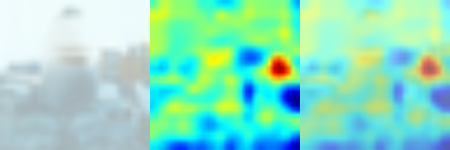

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  dog
activation Size :  (16, 16, 128)


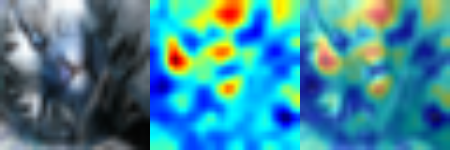

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  cat
activation Size :  (16, 16, 128)


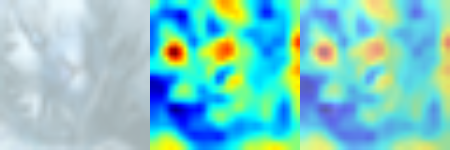

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  plane
activation Size :  (16, 16, 128)


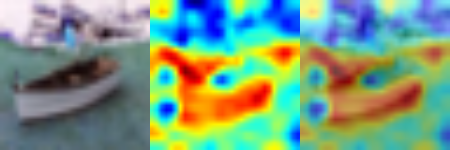

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  ship
activation Size :  (16, 16, 128)


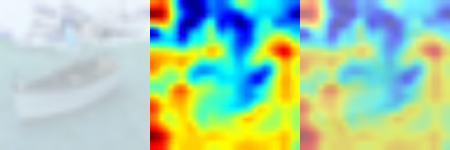

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  truck
activation Size :  (16, 16, 128)


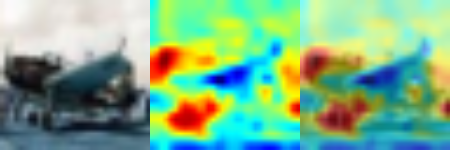

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  plane
activation Size :  (16, 16, 128)


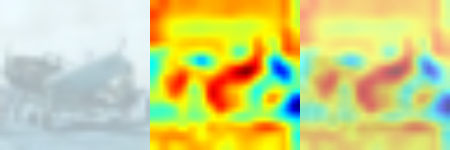

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


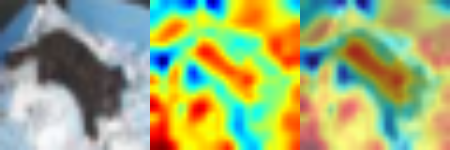

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  dog
activation Size :  (16, 16, 128)


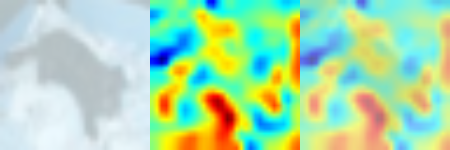

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


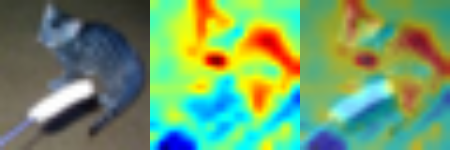

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  cat
activation Size :  (16, 16, 128)


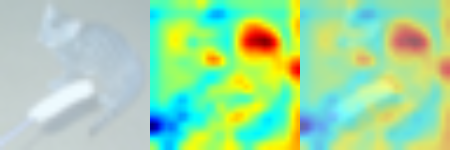

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  dog
activation Size :  (16, 16, 128)


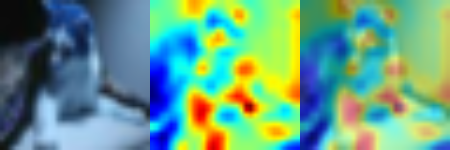

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  cat
activation Size :  (16, 16, 128)


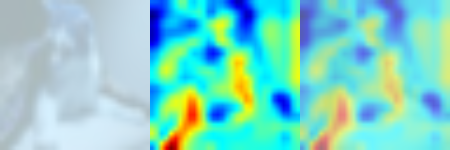

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


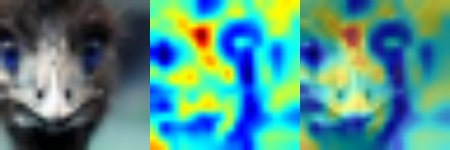

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


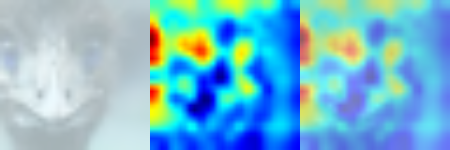

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  truck
activation Size :  (16, 16, 128)


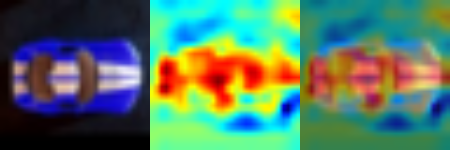

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  car
activation Size :  (16, 16, 128)


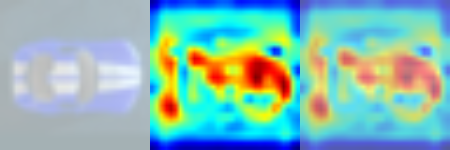

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  bird
activation Size :  (16, 16, 128)


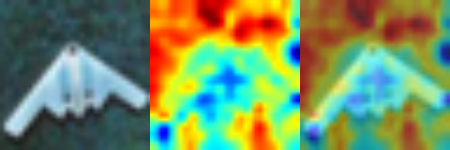

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  plane
activation Size :  (16, 16, 128)


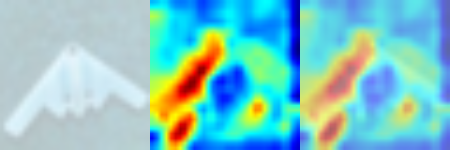

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  bird
activation Size :  (16, 16, 128)


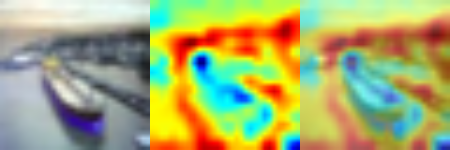

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  ship
activation Size :  (16, 16, 128)


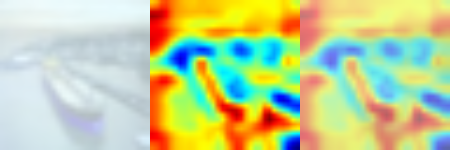

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  bird
activation Size :  (16, 16, 128)


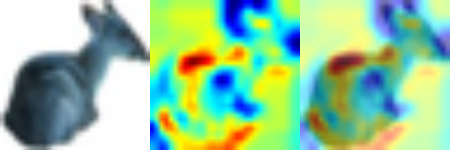

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  deer
activation Size :  (16, 16, 128)


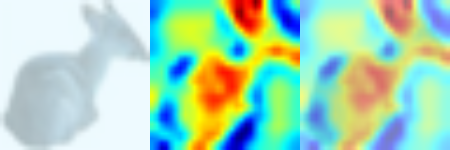

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


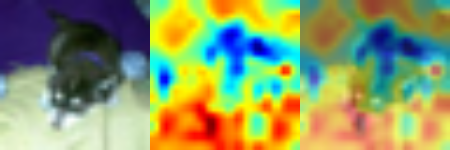

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  dog
activation Size :  (16, 16, 128)


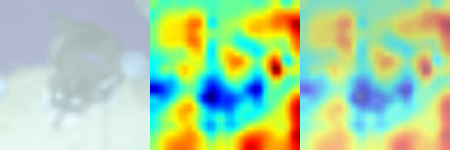

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  plane
activation Size :  (16, 16, 128)


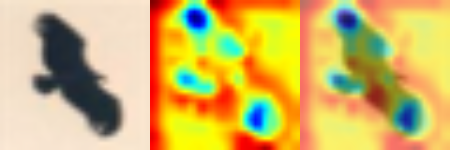

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


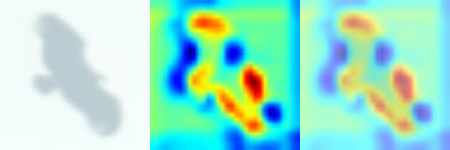

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


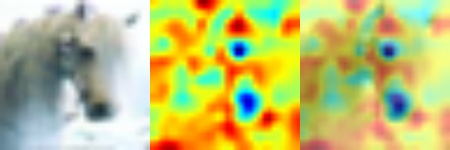

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  horse
activation Size :  (16, 16, 128)


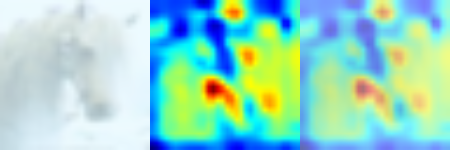

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


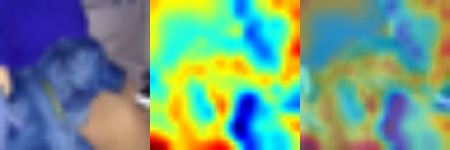

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  dog
activation Size :  (16, 16, 128)


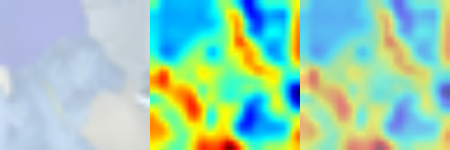

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  dog
activation Size :  (16, 16, 128)


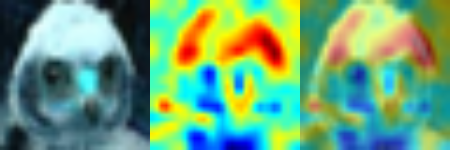

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


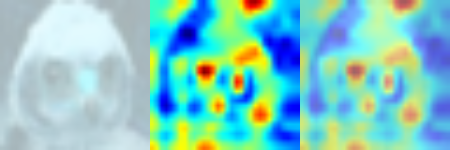

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


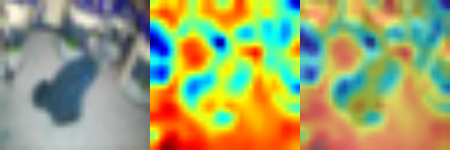

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  frog
activation Size :  (16, 16, 128)


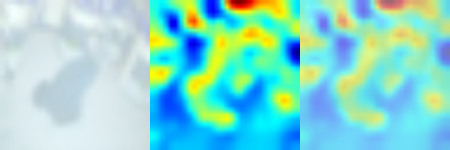

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  car
activation Size :  (16, 16, 128)


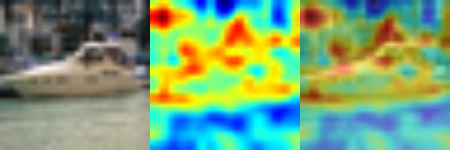

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  ship
activation Size :  (16, 16, 128)


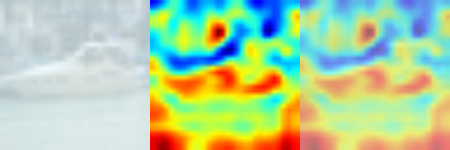

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


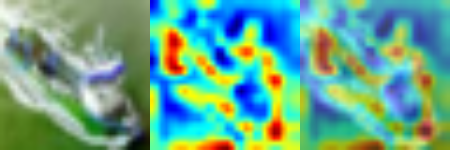

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  ship
activation Size :  (16, 16, 128)


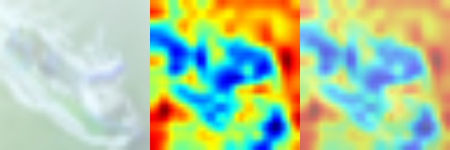

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


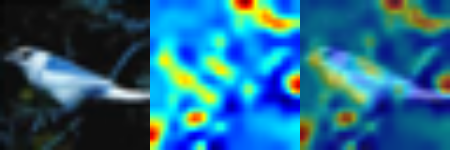

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


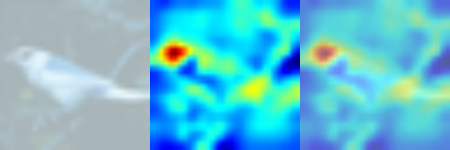

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  cat
activation Size :  (16, 16, 128)


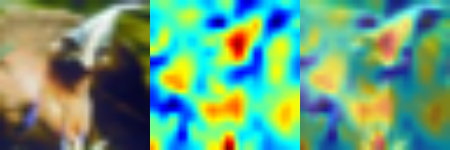

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  bird
activation Size :  (16, 16, 128)


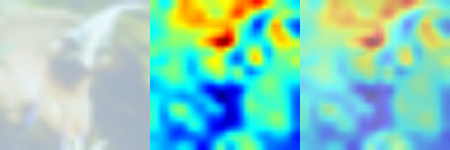

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  frog
activation Size :  (16, 16, 128)


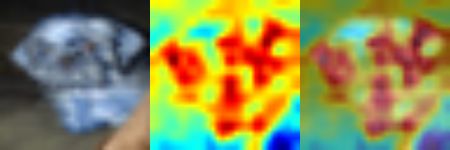

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  dog
activation Size :  (16, 16, 128)


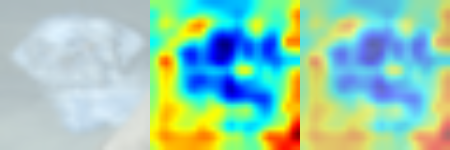

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################
####################################################################
Predicted value =  truck
activation Size :  (16, 16, 128)


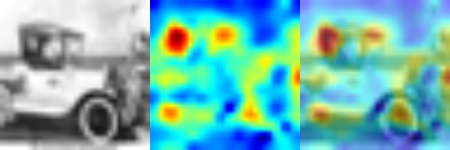

     ACTUAL          GRADCAM           Gradcam+Image
Actual Value    =  car
activation Size :  (16, 16, 128)


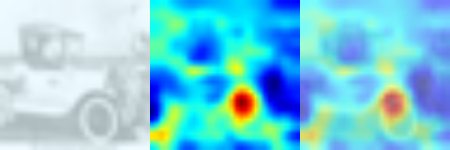

     ACTUAL          GRADCAM           Gradcam+Image
####################################################################


In [12]:

import random
import torch
from torch import nn
import torch.nn as nn
from torch.nn import functional as F
from torchvision.utils import save_image
from torchvision.models import densenet121, resnet18, resnet152, resnet101
from torchvision.transforms import functional as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from GradCAM import GradCAM

cifar10_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

model = cifar_model.m_model.to('cpu')
gradcam_object = GradCAM.GradCAM(model, model.layer2, cifar10_classes)


print('incorrect samples collected for gradcam=',len(cifar_model.m_incorrect_samples))
if(len(cifar_model.m_incorrect_samples) > 1):
  images = [x for x in random.sample(cifar_model.m_incorrect_samples, 30)]
  for img in images:
    print("####################################################################")
    im_      = img['image'].reshape(1,3,32,32).clone().detach()
    prediction = img["prediction"].item()
    label      = img["label"].item()
    print("Predicted value = ", cifar10_classes[prediction])
    cam, heatmap, pred = gradcam_object.forward(im_, prediction, retain_graph= True)
    gradcam_object.visualiseGradcam(heatmap, im_)

    print("Actual Value    = ",cifar10_classes[label])
    cam, heatmap, pred = gradcam_object.forward(im_, label, retain_graph= True)
    gradcam_object.visualiseGradcam(heatmap, im_)

    print("####################################################################")
  

